In [1]:
# IMPORTS
import os
import numpy as np
from data import read_stock_history, normalize, write_to_h5py
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import csv
import datetime
import h5py
print("Imports Complete!")

Imports Complete!


### Read CSV

In [3]:
# Read original CSV
data_df = pd.read_csv("datasets/standard_datasets/djia.csv")
data_df.head(-10)

,A,B,C,D,E,F,G,H,I,J,...,U,V,W,X,Y,Z,[,\,],^
0,1.032426,1.005229,0.978534,1.010430,0.968716,1.042328,1.027059,0.968913,0.975064,1.004860,...,1.027326,0.984783,0.958580,0.961499,1.028332,0.987438,0.953663,0.972085,1.078765,1.038237
1,1.013460,0.989542,0.991090,1.024823,0.921702,0.985222,0.966621,1.004154,0.939098,0.967146,...,1.000000,0.993342,0.949822,0.922998,1.014166,0.936605,0.934702,0.976542,1.037037,1.010716
2,1.028755,0.952939,0.989874,1.020859,0.874866,0.958949,0.972743,1.025861,0.943095,0.927100,...,1.007718,0.988693,0.995503,0.922998,0.970058,0.933100,0.936834,0.972085,1.003210,0.974184
3,0.990517,0.933487,0.996760,1.080726,0.839113,0.988688,0.961683,1.000000,0.942136,0.891913,...,0.968711,0.978125,1.026746,0.902635,0.970058,0.942156,0.942444,0.961764,1.027901,0.933025
4,1.001835,0.934742,0.970838,1.103045,0.834644,0.962416,1.006123,0.989012,0.965153,0.922240,...,0.977889,0.987425,1.044497,0.884497,0.978107,0.964067,0.933356,0.950035,1.024691,0.928641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,0.716427,0.538172,1.103686,1.126408,0.659814,0.671958,0.488051,1.174997,0.524137,0.475311,...,0.891740,0.848145,0.979882,0.848563,0.535415,0.502775,0.635588,0.838611,0.899012,0.856795
493,0.704803,0.529805,1.111786,1.122653,0.651770,0.671593,0.477977,1.172853,0.521899,0.470451,...,0.889654,0.842862,0.981775,0.850445,0.528332,0.490213,0.638730,0.830870,0.883951,0.850706
494,0.705414,0.529178,1.090725,1.113684,0.651412,0.677066,0.482915,1.171513,0.521579,0.470257,...,0.888611,0.829547,0.989349,0.851472,0.533162,0.487584,0.638842,0.828525,0.892099,0.855821
495,0.689507,0.516628,1.075537,1.104923,0.637826,0.666667,0.470077,1.159721,0.516784,0.462092,...,0.882562,0.817500,0.977988,0.841205,0.515454,0.479112,0.628296,0.812573,0.880000,0.841939


In [4]:
asset_list = data_df.columns.tolist()

In [5]:
# For each asset
result = []
for a in asset_list:
    result_asset = []
    _open = None
    for close in data_df[a]:
        if _open is not None:
            result_asset.append([_open, close])
        _open = close
    result.append(result_asset)        

In [6]:
result = np.array(result)

In [7]:
result[0]

array([[1.03242582, 1.01345977],
       [1.01345977, 1.02875497],
       [1.02875497, 0.99051698],
       ...,
       [0.68828388, 0.697461  ],
       [0.697461  , 0.69960232],
       [0.69960232, 0.70847354]])

In [8]:
result.shape

(30, 506, 2)

### Save H5

In [9]:
# Lets get actual Stock Names!
# NYSE(O)
#actual_asset_names = ['ahp', 'alcoa', 'amer_brands', 'arco', 'coke', 'comm_metals', 'dow_chem', 'Dupont', 
#              'espey_manufacturing', 'Exxon', 'fischbach', 'ford', 'ge', 'gm', 'gte', 'gulf', 'hp',
#              'ibm', 'ingersoll', 'Iroquois', 'jnj', 'kimb-clark', 'kin_ark', 'Kodak', 'lukens', 
#              'mei_corp', 'merck', 'mmm', 'mobil', 'morris', 'p_and_g', 'Pillsbury', 'schlum',
#              'sears', 'sher_will', 'texaco']
# NYSE(N)
#actual_asset_names = ['ahp', 'alcoa', 'amer_brands', 'coke', 'comm_metals', 'dow_chem', 'Dupont', 
#                'ford', 'ge', 'gm', 'hp', 'ibm', 'ingersoll', 'jnj', 'kimb-clark', 'kin_ark', 'Kodak', 
#                'merck', 'mmm', 'morris', 'p_and_g', 'schlum', 'sher_will']
# DJIA
actual_asset_names = ['LCOA INC', 'GENERAL ELEC CO', 'JOHNSON&JOHNSON', 'MICROSOFT CP', 'AMER EXPRESS CO',
    'GENERAL MOTORS', 'JP MORGAN CHASE', 'PROCTER & GAMBLE', 'BOEING CO', 'HOME DEPOT INC', 'COCA COLA CO',
    'SBC COMMS', 'CITIGROUP', 'HONEYWELL INTL', 'MCDONALDS CORP', 'AT&T CORP', 'CATERPILLAR', 'HEWLETT-PACKARD',
    '3M COMPANY', 'UNITED TECH CP', 'DU PONT CO', 'INTL BUS MACHINE', 'PHILIP MORRIS', 'WAL-MART STORES',
    'WALT DISNEY CO', 'INTEL CORP', 'MERCK & CO', 'EXXON MOBIL', 'EASTMAN KODAK', 'INTL PAPER CO']

abb = [abbr.encode() for abbr in actual_asset_names]
print(abb)
print("Length of Assets: {}".format(len(actual_asset_names)))

[b'LCOA INC', b'GENERAL ELEC CO', b'JOHNSON&JOHNSON', b'MICROSOFT CP', b'AMER EXPRESS CO', b'GENERAL MOTORS', b'JP MORGAN CHASE', b'PROCTER & GAMBLE', b'BOEING CO', b'HOME DEPOT INC', b'COCA COLA CO', b'SBC COMMS', b'CITIGROUP', b'HONEYWELL INTL', b'MCDONALDS CORP', b'AT&T CORP', b'CATERPILLAR', b'HEWLETT-PACKARD', b'3M COMPANY', b'UNITED TECH CP', b'DU PONT CO', b'INTL BUS MACHINE', b'PHILIP MORRIS', b'WAL-MART STORES', b'WALT DISNEY CO', b'INTEL CORP', b'MERCK & CO', b'EXXON MOBIL', b'EASTMAN KODAK', b'INTL PAPER CO']
Length of Assets: 30


#### NYSE(0) Jul 3, 1962 to Dec 31, 1984

In [39]:
# Lets try creating the dataset with pandas-market-calendars
import pandas_market_calendars as mcal
# Create a calendar
nyse = mcal.get_calendar('EUREX')
# NYSE(O)
#our_range = nyse.schedule(start_date='1962-07-03', end_date='1984-12-31')
# NYSE(N)
#our_range = nyse.schedule(start_date='1985-01-01', end_date='2010-06-30')
# DJIA
our_range = nyse.schedule(start_date='2001-01-14', end_date='2003-01-14') #Jan 14, 2001 to Jan 14, 2003
date_times = mcal.date_range(our_range, frequency='1D')

In [43]:
print("length: {}".format(len(date_times)))
# lets remove the first one
#l = len(date_times)
#date_times = date_times[0:l]#date_times[1:l]
l = result.shape[1]
date_times = date_times[0:l]#date_times[1:l]
print("length: {}".format(len(date_times)))

length: 508
length: 506


In [44]:
# convert to strings
dates = [date_obj.strftime('%d/%m/%Y') for date_obj in date_times.tolist()]
dates[0]

'15/01/2001'

In [45]:
len(abb)

30

In [46]:
write_to_h5py(result, abb, dates, "datasets/djia.h5")

In [47]:
with h5py.File('datasets/djia.h5', 'r') as f:
    history = f['history'][:]
    abbreviation = f['abbreviation'][:].tolist()
    dates = f['dates'][:].tolist()

# Test
print(abbreviation[0:5])
print(dates[0:5])
print(history[0:5])
print(history.shape)

['LCOA INC', 'GENERAL ELEC CO', 'JOHNSON&JOHNSON', 'MICROSOFT CP', 'AMER EXPRESS CO']
['15/01/2001', '16/01/2001', '17/01/2001', '18/01/2001', '19/01/2001']
[[[1.03242582 1.01345977]
  [1.01345977 1.02875497]
  [1.02875497 0.99051698]
  ...
  [0.68828388 0.697461  ]
  [0.697461   0.69960232]
  [0.69960232 0.70847354]]

 [[1.00522903 0.98954194]
  [0.98954194 0.95293872]
  [0.95293872 0.93348672]
  ...
  [0.54172767 0.53649864]
  [0.53649864 0.53628948]
  [0.53628948 0.53775361]]

 [[0.97853382 0.99108951]
  [0.99108951 0.98987444]
  [0.98987444 0.99675982]
  ...
  [1.15127582 1.15836371]
  [1.15836371 1.13487242]
  [1.13487242 1.14135277]]

 [[1.0104297  1.0248227 ]
  [1.0248227  1.02085941]
  [1.02085941 1.08072591]
  ...
  [1.16416354 1.16645807]
  [1.16645807 1.17626199]
  [1.17626199 1.18836045]]

 [[0.96871648 0.92170182]
  [0.92170182 0.87486593]
  [0.87486593 0.83911334]
  ...
  [0.68090812 0.68251698]
  [0.68251698 0.68895245]
  [0.68895245 0.68698606]]]
(30, 506, 2)


In [48]:
len(history[10])

506

In [49]:
len(dates)

506

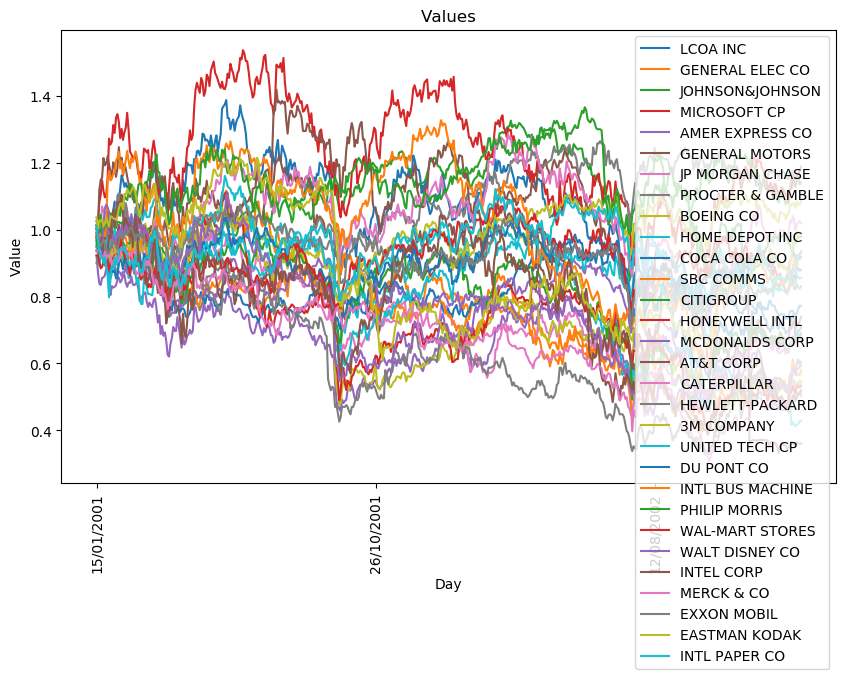

In [50]:
# Plot
log_y = False
df = pd.DataFrame()
df["Date"] = dates
df.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6), dpi=100)
if log_y:
    plt.title('Values (LOG Y)')
    plt.ylabel('Value (LOG Y)')
else:
    plt.title('Values')
    plt.ylabel('Value')
plt.xlabel('Day')

for i in range(len(abbreviation)):
    df[abbreviation[i]] = [x[1] for x in history[i]]
    plt.plot(df[abbreviation[i]], label=abbreviation[i])
if log_y:
    plt.yscale('log')
plt.xticks(np.arange(0, len(dates), 200))
plt.xticks(rotation=90)
plt.legend()
plt.show()

----------------
## Create Subset Dataset with the 3 of the Best and 3 of the Worst

Average logarithmic accumulated return

In [17]:
def alar_reward(dataseries):
    r1 = np.log(dataseries.iloc[-1] / (dataseries.iloc[0]))  # log rate of return
    reward = r1 / len(dataseries) * 1000.  # (22) average logarithmic accumulated return
    return reward

In [18]:
# Python code to sort the tuples using second element  
# of sublist Inplace way to sort using sort() 
def Sort(sub_li, length=None, reverse=False): 
    # key is set to sort using second element of  
    # sublist lambda has been used 
    sub_li.sort(key = lambda x: x[1], reverse = reverse)
    if length != None:
        return sub_li[0:length]
    return sub_li 

In [19]:
# Parameters
num_of_each = 2
train_test_ratio = 3/4
train_end_point = round(len(data_df) * train_test_ratio)
print("We'll judge based on Training Set Data. Therefore, up to step: ", train_end_point)

We'll judge based on Training Set Data. Therefore, up to step:  4823


In [20]:
wealth_list = []
i = 0
for a in asset_list:
    wealth_list.append([i, round(alar_reward(data_df[a][:train_end_point]), 2)])
    i = i + 1
print(wealth_list)

[[0, 0.53], [1, 0.51], [2, 0.56], [3, 0.7], [4, 0.4], [5, 0.56], [6, 0.49], [7, 0.52], [8, 0.65], [9, 0.28], [10, 0.45], [11, 0.34], [12, 0.59], [13, 0.74], [14, 0.59], [15, -0.18], [16, 0.18], [17, 0.71], [18, 0.56], [19, 0.75], [20, 0.65], [21, 0.36], [22, 0.55]]


In [21]:
# Order by Wealth
best = Sort(wealth_list, length=num_of_each, reverse=True)
worst = Sort(wealth_list, length=num_of_each)
print('Best Stocks by wealth: \n', best)
print('Worst Stocks by wealth: \n', worst)

Best Stocks by wealth: 
 [[19, 0.75], [13, 0.74]]
Worst Stocks by wealth: 
 [[15, -0.18], [16, 0.18]]


In [22]:
# Get Asset Names
best_asset_names = []
worst_asset_names = []
for x in best:
    best_asset_names.append(actual_asset_names[x[0]])
for x in worst:
    worst_asset_names.append(actual_asset_names[x[0]])
print('Best Assets: ', best_asset_names)
print('Worst Assets: ', worst_asset_names)

Best Assets:  ['morris', 'jnj']
Worst Assets:  ['kin_ark', 'Kodak']


In [23]:
# Create Subset
subset_asset_names = best_asset_names + worst_asset_names
# Get Data
subset_asset_result = []
subset = best + worst
for x in subset:
    i = x[0]
    subset_asset_result.append(result[i])
subset_asset_result = np.array(subset_asset_result)
print(subset_asset_names)
print(subset_asset_result.shape)

['morris', 'jnj', 'kin_ark', 'Kodak']
(4, 6430, 2)


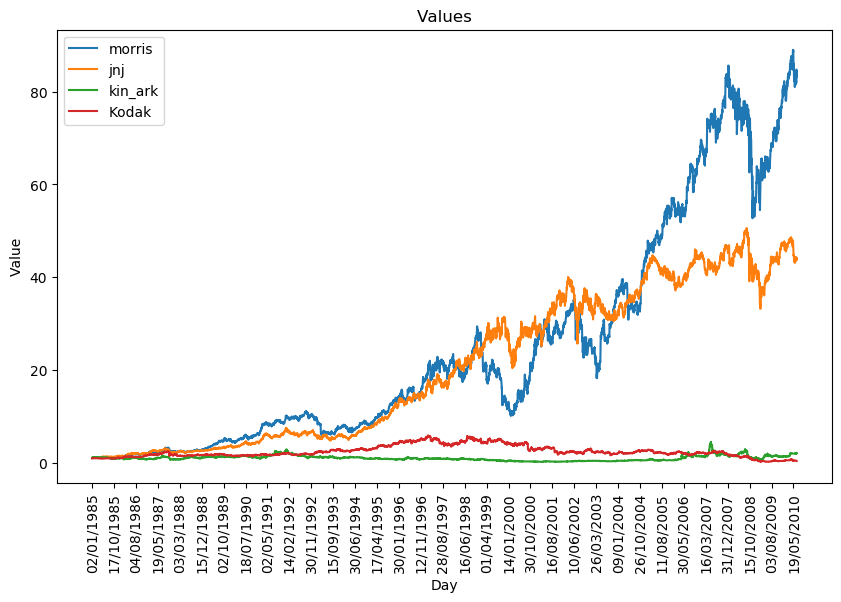

In [24]:
# Plot
log_y = False
df = pd.DataFrame()
df["Date"] = dates
df.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6), dpi=100)
if log_y:
    plt.title('Values (LOG Y)')
    plt.ylabel('Value (LOG Y)')
else:
    plt.title('Values')
    plt.ylabel('Value')
plt.xlabel('Day')

for i in range(len(subset_asset_names)):
    df[subset_asset_names[i]] = [x[1] for x in subset_asset_result[i]]
    plt.plot(df[subset_asset_names[i]], label=subset_asset_names[i])
if log_y:
    plt.yscale('log')
plt.xticks(np.arange(0, len(dates), 200))
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [25]:
# Save as H5
abb = [abbr.encode() for abbr in subset_asset_names]
print(abb)

[b'morris', b'jnj', b'kin_ark', b'Kodak']


In [26]:
subset_asset_result

array([[[ 0.9845    ,  0.9845    ],
        [ 0.9845    ,  0.99071219],
        [ 0.99071219,  0.9829252 ],
        ...,
        [82.25409774, 84.7592987 ],
        [84.7592987 , 83.08916478],
        [83.08916478, 83.5066983 ]],

       [[ 0.98619   ,  0.97231431],
        [ 0.97231431,  0.9896215 ],
        [ 0.9896215 ,  0.9896215 ],
        ...,
        [43.64683895, 44.16732938],
        [44.16732938, 44.01861785],
        [44.01861785, 43.86990632]],

       [[ 1.03333   ,  1.10000045],
        [ 1.10000045,  1.06667044],
        [ 1.06667044,  1.10000389],
        ...,
        [ 2.1544495 ,  2.04672703],
        [ 2.04672703,  2.01979641],
        [ 2.01979641,  2.04672703]],

       [[ 0.98609   ,  0.97391179],
        [ 0.97391179,  0.9652245 ],
        [ 0.9652245 ,  0.97565857],
        ...,
        [ 0.44826988,  0.43912151],
        [ 0.43912151,  0.40252805],
        [ 0.40252805,  0.39337969]]])

In [27]:
#write_to_h5py(subset_asset_result, abb, dates, "datasets/nyse_n_subset_4.h5")

In [28]:
with h5py.File('datasets/nyse_n_subset_4.h5', 'r') as f:
    history = f['history'][:]
    abbreviation = f['abbreviation'][:].tolist()
    dates = f['dates'][:].tolist()

# Test
print(abbreviation)
print(dates[0:5])
print(history)
print(history.shape)

OSError: Unable to open file (unable to open file: name = 'datasets/nyse_n_subset_4.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

--------------


### Calculate Correlation Between Stocks

In [ ]:
def returns(dataseries):
    r = dataseries[:,1]/ (dataseries[:,0])
    return r

def log_returns(dataseries):
    l = np.log(dataseries[:,1]/ (dataseries[:,0]))
    return l

In [ ]:
def cov(x,y):
 
    if len(x) != len(y):
        return
         
    n = len(x)
     
    xy = [x[i]*y[i] for i in range(n)]
     
    mean_x = sum(x)/float(n)
    mean_y = sum(y)/float(n)
     
    return (sum(xy) - n*mean_x * mean_y) / float(n)
    # following code is can also be used to calculate the same result
    #return sum([(x[i]-mean_x)*(y[i]-mean_y) for i in range(n)])
    
def sd(x):
    if len(x) == 0:
        return 0
    n = len(x)
     
    mean_x = sum(x)/float(n)    
    variance = sum( [(x[i] - mean_x)**2 for i in range(n)])/float(n)
    return variance**0.5
     
def corr(x,y):
    if len(x) != len(y):
        return
         
    correlation = cov(x,y) / float(sd(x)*sd(y))
    return correlation

In [ ]:
# Correlation
done_list = []
for i in range(len(abbreviation)):
    done_list.append(i)
    for j in range(len(abbreviation)):
        if i != j:
            if j not in done_list:
                c = corr(log_returns(history[i]), log_returns(history[j]))
                print('corr({}, {}): {}'.format(abbreviation[i], abbreviation[j], c))